In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
def simulate_circuit(circuit, shots=1024):
    backend = Aer.get_backend('qasm_simulator')
    job = execute(circuit, backend=backend, shots=shots)
    result = job.result()
    counts = result.get_counts(circuit)
    return counts

# Deutsch's algorithm

We have a function $f$ that takes a bit string as input and returns a bit string as output. The function is either constant or balanced. A constant function always returns the same bit string, while a balanced function returns the opposite bit string. For example, $f(0) = 0$ and $f(1) = 1$ is a constant function, while $f(0) = 1$ and $f(1) = 0$ is a balanced function.

To do this we must define a possible implementation of our oracle $U_f$ such that it will represent either a balenced or constant function $f$. Then we give this oracle 2 inputs, the quantum superposition $|+\rangle$ and the quantum superposition $|-\rangle$. If the oracle is a constant function, then measuring the first quibit should give us always the state $|0\rangle$ and the second quibit should give us always the state $|-\rangle$. If the oracle is a balanced function, then measuring the first quibit should give us always the state $|1\rangle$ and the second quibit should give us always the state $|-\rangle$. In doubt always remember ... do the math\!

Let's define all the possible functions in a Quantum Circuit.

In [ ]:
def constant_0(qc: QuantumCircuit, q_in: QuantumRegister, q_out: QuantumRegister, barriers: bool = False):
    """
    Applies the constant function f(x) = 0 to the input register. The ouput quibit is not changed.
    """
    if barriers:
        qc.barrier()
    if barriers:
        qc.barrier()

def constant_1(qc: QuantumCircuit, q_in: QuantumRegister, q_out: QuantumRegister, barriers: bool = False):
    """
    Applies the constant function f(x) = 1 to the input register.
    """
    if barriers:
        qc.barrier()
    qc.x(q_out)
    if barriers:
        qc.barrier()

def balanced_1(qc: QuantumCircuit, q_in: QuantumRegister, q_out: QuantumRegister, barriers: bool = False):
    """
    Applies the balanced function f(x) = x + 1 to the input register.
    """
    if barriers:
        qc.barrier()
    qc.cx(q_in, q_out)
    if barriers:
        qc.barrier()

def balanced_2(qc: QuantumCircuit, q_in: QuantumRegister, q_out: QuantumRegister, barriers: bool = False):
    """
    Applies the balanced function f(x) = not(x+1) to the input register.
    """
    if barriers:
        qc.barrier()
    qc.x(q_out)
    qc.cx(q_in, q_out)
    if barriers:
        qc.barrier()

In [ ]:
q_in = QuantumRegister(1, 'input')
q_out = QuantumRegister(1, 'output')
cr = ClassicalRegister(2, 'classical')
qc = QuantumCircuit(q_in, q_out, cr)
constant_0(qc, q_in, q_out, True)
qc.draw(output='mpl')

In [ ]:
q_in = QuantumRegister(1, 'input')
q_out = QuantumRegister(1, 'output')
cr = ClassicalRegister(2, 'classical')
qc = QuantumCircuit(q_in, q_out, cr)
constant_1(qc, q_in, q_out, True)
qc.draw(output='mpl')

In [ ]:
q_in = QuantumRegister(1, 'input')
q_out = QuantumRegister(1, 'output')
cr = ClassicalRegister(2, 'classical')
qc = QuantumCircuit(q_in, q_out, cr)
balanced_1(qc, q_in, q_out, True)
qc.draw(output='mpl')

In [ ]:
q_in = QuantumRegister(1, 'input')
q_out = QuantumRegister(1, 'output')
cr = ClassicalRegister(2, 'classical')
qc = QuantumCircuit(q_in, q_out, cr)
balanced_2(qc, q_in, q_out, True)
qc.draw(output='mpl')

### Testing constant function $f$

In [ ]:
q_in = QuantumRegister(1, 'input')
q_out = QuantumRegister(1, 'output')
cr = ClassicalRegister(2, 'classical')
qc = QuantumCircuit(q_in, q_out, cr)

# Apply Hadamard gate to first qubit
qc.h(q_in)

# Prepare the the second qubit in the |-> state
qc.x(q_out)
qc.h(q_out)

# Apply the oracle
constant_0(qc, q_in, q_out, True)

# Apply Hadamard gate to first qubit
qc.h(q_in)

# Measure the first qubit
qc.measure(q_in, cr[0])
qc.measure(q_out, cr[1])

qc.draw(output='mpl')

In [ ]:
counts = simulate_circuit(qc)
plot_histogram(counts)

In [ ]:
q_in = QuantumRegister(1, 'input')
q_out = QuantumRegister(1, 'output')
cr = ClassicalRegister(2, 'classical')
qc = QuantumCircuit(q_in, q_out, cr)

# Apply Hadamard gate to first qubit
qc.h(q_in)

# Prepare the the second qubit in the |-> state
qc.x(q_out)
qc.h(q_out)

# Apply the oracle
constant_1(qc, q_in, q_out, True)

# Apply Hadamard gate to first qubit
qc.h(q_in)

# Measure the first qubit
qc.measure(q_in, cr[0])
qc.measure(q_out, cr[1])

qc.draw(output='mpl')

In [ ]:
counts = simulate_circuit(qc)
plot_histogram(counts)

### Testing balanced function $f$

In [ ]:
q_in = QuantumRegister(1, 'input')
q_out = QuantumRegister(1, 'output')
cr = ClassicalRegister(2, 'classical')
qc = QuantumCircuit(q_in, q_out, cr)

# Apply Hadamard gate to first qubit
qc.h(q_in)

# Prepare the the second qubit in the |-> state
qc.x(q_out)
qc.h(q_out)

# Apply the oracle
balanced_1(qc, q_in, q_out, True)

# Apply Hadamard gate to first qubit
qc.h(q_in)

# Measure the first qubit
qc.measure(q_in, cr[0])
qc.measure(q_out, cr[1])

qc.draw(output='mpl')

In [ ]:
counts = simulate_circuit(qc)
plot_histogram(counts)

In [ ]:
q_in = QuantumRegister(1, 'input')
q_out = QuantumRegister(1, 'output')
cr = ClassicalRegister(2, 'classical')
qc = QuantumCircuit(q_in, q_out, cr)

# Apply Hadamard gate to first qubit
qc.h(q_in)

# Prepare the the second qubit in the |-> state
qc.x(q_out)
qc.h(q_out)

# Apply the oracle
balanced_2(qc, q_in, q_out, True)

# Apply Hadamard gate to first qubit
qc.h(q_in)

# Measure the first qubit
qc.measure(q_in, cr[0])
qc.measure(q_out, cr[1])

qc.draw(output='mpl')

In [ ]:
counts = simulate_circuit(qc)
plot_histogram(counts)

# Bernstein-Vazirani algorithm

This quantum algorithm tries to solve the following problem. Given a function $f: \{0,1\}^{n} \rarr \{0,1\}$ such that $f(x) = s \cdot x$. Find with only one execution of $f$. 

As before the algorithm will have 3 parts:

- Parallezation
Apply $H$ Gates to all the bits in the input bit string. The resulting state will be:


$$
\begin{aligned}
(H^{n} \otimes I)\ket{\psi _0} \Leftrightarrow
\end{aligned}
$$
$$
\begin{aligned} \tag{1}
\Leftrightarrow (H^{n} \otimes I)\ket{x}\ket{-} = \frac{1}{\sqrt{2^{n}}}\left(\sum_{z \in 2^{n}} \ket{z}\right) \otimes \ket{-} = \ket{\psi_1}
\end{aligned}
$$

- Interference Pattern due to Phase Kickback <br>
The function $f$ will be applied to a eigenvector of its unitary which will result in a relative phase on the input qubits. After the transformation the resulting state will be:

$$
\begin{aligned}
U_f\ket{\psi _1} \Leftrightarrow
\end{aligned}
$$
$$
\begin{aligned} \tag{2}
\Leftrightarrow \frac{1}{\sqrt{2^{n}}}\left(\sum_{z \in 2^{n}} (-1)^{z \cdot s}\ket{z}\right) \otimes \ket{-} = \ket{\psi_2}
\end{aligned}
$$

- Wave Function Collapse <br>
Finally, by applying $H$ gates to all the input qubits again the interference pattern make all the unwanted states to have probability 0. Therefore, the only state left (which will have probability 1) will be the desired bit string $s$.

$$
\begin{aligned}
U_f\ket{\psi _1} \Leftrightarrow
\end{aligned}
$$
$$
\begin{aligned}
\Leftrightarrow \frac{1}{2^{n}}\left(\sum_{z \in 2^{n}}\sum_{z^{,} \in 2^{n}}(-1)^{z \cdot s}(-1)^{z \cdot z^{,}}\ket{z^{,}}\right) \otimes \ket{-} \Leftrightarrow
\end{aligned}
$$
$$
\begin{aligned} \tag{3}
\Leftrightarrow \frac{1}{2^{n}}\left(\sum_{z \in 2^{n}}\sum_{z^{,} \in 2^{n}}(-1)^{z \cdot (s \oplus z^{,})}\ket{z^{,}}\right) \otimes \ket{-} = \ket{\psi_3}
\end{aligned}
$$

If we calculate the probability of measuring the state $\ket{s}$ we would get 1.

Let's define the Oracle.


In [11]:
def Bernstein_Vazirani_oracle(qc: QuantumCircuit, q_in: QuantumRegister, q_out: QuantumRegister, s: str, barriers: bool = False):
    """
    The way this function is implemented is the following. 
    Say we want our string s to be '101' and supose our input state is '110'. 
    This means that f('110') = '110' * '101' = 1 ^ 1 + 1 ^ 0 + 0 ^ 1 = 1 + 0 + 0 = 1.

    If we consider what a cx gate thus:

    cx|0x> = |0x> && cx|1x> = |1(not x)>. This behaviour sounds like a mod 2 sum. Therefore in this case our oracle would be.
    cx(0, 3); cx(2, 3);
    """

    if barriers: qc.barrier()

    # decode the bit string s
    s_decoded = list(reversed([int(x) for x in s]))

    # apply cx gates every time a bit in s is equal to 1
    for i, bit in enumerate(s_decoded):
        if bit:
            qc.cx(q_in[i], q_out)

    if barriers: qc.barrier()

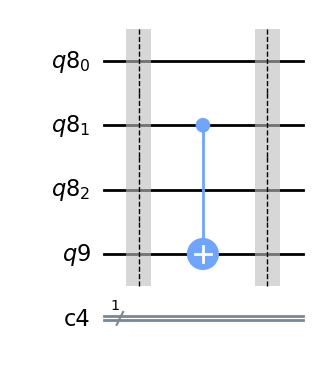

In [13]:
q_in = QuantumRegister(3, 'input')
q_out = QuantumRegister(1, 'output')
cr = ClassicalRegister(3, 'classical')
qc = QuantumCircuit(q_in, q_out, cr)

Bernstein_Vazirani_oracle(qc, q_in, q_out, '010', True)
qc.draw(output="mpl")

### Testing the Oracle

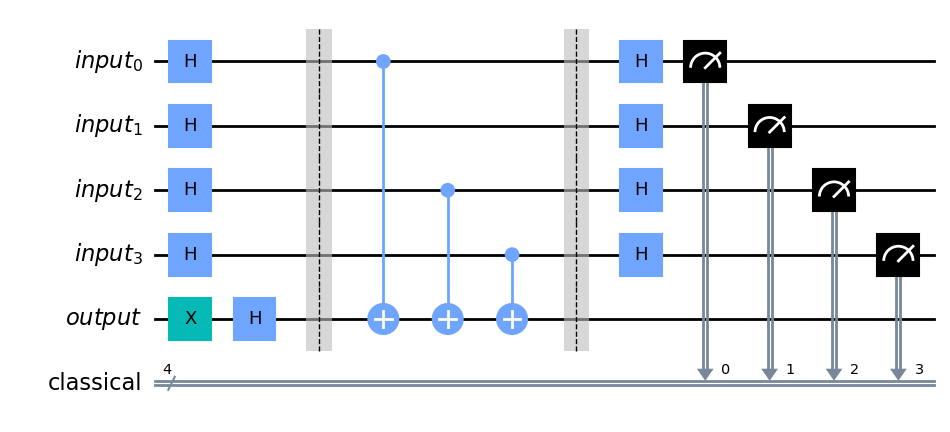

In [23]:
# Define bit string
s = '1101' 
n = len(s)

q_in = QuantumRegister(n, 'input')
q_out = QuantumRegister(1, 'output')
cr = ClassicalRegister(n, 'classical')
qc = QuantumCircuit(q_in, q_out, cr)

# Apply H gate to all input quibits
qc.h(q_in)

# Prepare output qubit in superposition state |->
qc.x(q_out)
qc.h(q_out)

# Apply Oracle
Bernstein_Vazirani_oracle(qc, q_in, q_out, s, True)

# Collapse Wave Functions
qc.h(q_in)

# measure input qubits
qc.measure(q_in, cr)

qc.draw(output="mpl")

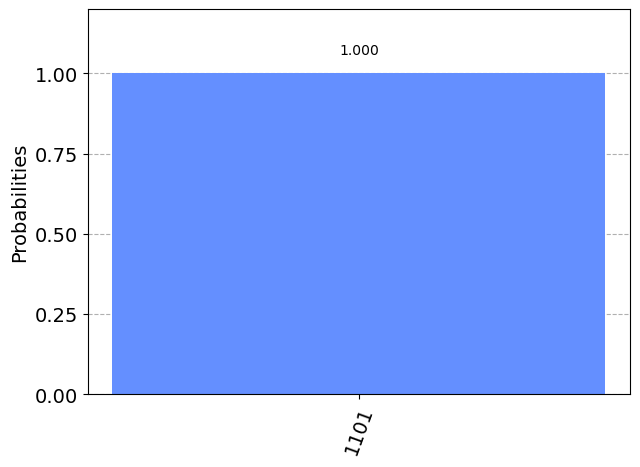

In [24]:
counts = simulate_circuit(qc)
plot_histogram(counts)

# Deutsch-Jozsa algorithm

This version of the Deutsch algorithm solves the same problem of determining whether a function $f$ is balanced or constant. However, this time the function $f$ can have an arbitrary number of inputs hence $f: \{0,1\}^{n} \rarr \{0,1\}$.

As always the algorithm will begin with the application of $H$ gates to all the input qubits in order to create a superposition of all the possible input bit strings. It then follows the application of the oracle $U_f$ which has the same ouput as before. Finally, the algorithm applies $H$ gates to all the input qubits to collpse the wave function. The final state will be:

$$
\begin{aligned}
(H^{n} \otimes I)U_f(H^{n} \otimes I)\ket{0-} \Leftrightarrow
\end{aligned}
$$
$$
\begin{aligned} \tag{4}
\Leftrightarrow \frac{1}{2^{n}}\left(\sum_{z \in 2^{n}}(-1)^{f(z)}\sum_{z^{,} \in 2^{n}}(-1)^{z \cdot z^{,}}\ket{z^{,}}\right) \otimes \ket{-}
\end{aligned}
$$

From here we have only two possible scenarious:

- Either the function $f$ is constant. <br>
This way we can further simplify the equation to:

$$
\begin{aligned} \tag{4.1}
\frac{1}{2^{n}}\left((\pm 1)\sum_{z \in 2^{n}}\sum_{z^{,} \in 2^{n}}(-1)^{z \cdot z^{,}}\ket{z^{,}}\right) \otimes \ket{-}
\end{aligned}
$$

And if we measure the probability of measuring the state $\ket{0-}$ we would get 1.

- Or the function $f$ is balanced. <br>
This way we can further simplify the equation to:

$$
\begin{aligned} \tag{4.2}
\frac{1}{2^{n}}\left(\sum_{z \in 2^{n},f(z)=0}\sum_{z^{,} \in 2^{n}}(-1)^{z \cdot z^{,}}\ket{z^{,}} - \sum_{z \in 2^{n},f(z)=1}\sum_{z^{,} \in 2^{n}}(-1)^{z \cdot z^{,}}\ket{z^{,}}\right) \otimes \ket{-}
\end{aligned}
$$

And if we measure the probability of measuring the state $\ket{0-}$ we would get 0.

As we have said before in doubt do the math!

We will now define the Oracle. Note that because we are now using n input qubits that there will be many possible implementation of the oracle. 

We will use the following implementations:

In [4]:
def Deutsch_Jozsa_constant_oracle(qc: QuantumCircuit, q_in: QuantumRegister, q_out: QuantumRegister, barriers: bool = False):
    # Ouputs always 1
    if barriers: qc.barrier()

    qc.x(q_out)

    if barriers: qc.barrier()

def Deutsch_Jozsa_balanced_oracle(qc: QuantumCircuit, q_in: QuantumRegister, q_out: QuantumRegister, barriers: bool = False):
    if barriers: qc.barrier()

    qc.cx(q_in, q_out)

    if barriers: qc.barrier()

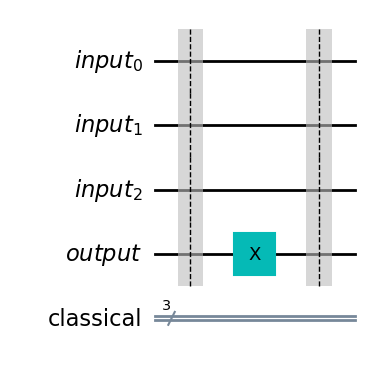

In [5]:
q_in = QuantumRegister(3, 'input')
q_out = QuantumRegister(1, 'output')
cr = ClassicalRegister(3, 'classical')
qc = QuantumCircuit(q_in, q_out, cr)

Deutsch_Jozsa_constant_oracle(qc, q_in, q_out, True)
qc.draw(output="mpl")

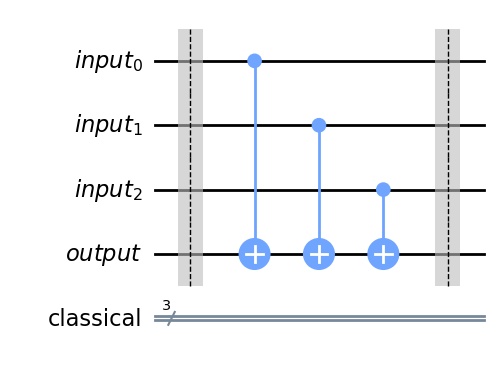

In [7]:
q_in = QuantumRegister(3, 'input')
q_out = QuantumRegister(1, 'output')
cr = ClassicalRegister(3, 'classical')
qc = QuantumCircuit(q_in, q_out, cr)

Deutsch_Jozsa_balanced_oracle(qc, q_in, q_out, True)
qc.draw(output="mpl")

### Testing the Oracle for constant function $f$

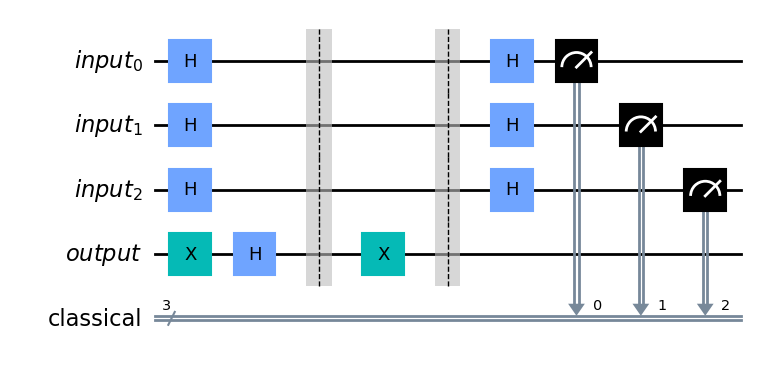

In [8]:
# define number of qubits
n = 3

q_in = QuantumRegister(n, 'input')
q_out = QuantumRegister(1, 'output')
cr = ClassicalRegister(n, 'classical')
qc = QuantumCircuit(q_in, q_out, cr)

# Apply H gate to all input quibits
qc.h(q_in)

# Prepare output qubit in superposition state |->
qc.x(q_out)
qc.h(q_out)

# Apply Oracle
Deutsch_Jozsa_constant_oracle(qc, q_in, q_out, True)

# Collapse Wave Functions
qc.h(q_in)

# measure input qubits
qc.measure(q_in, cr)

qc.draw(output="mpl")

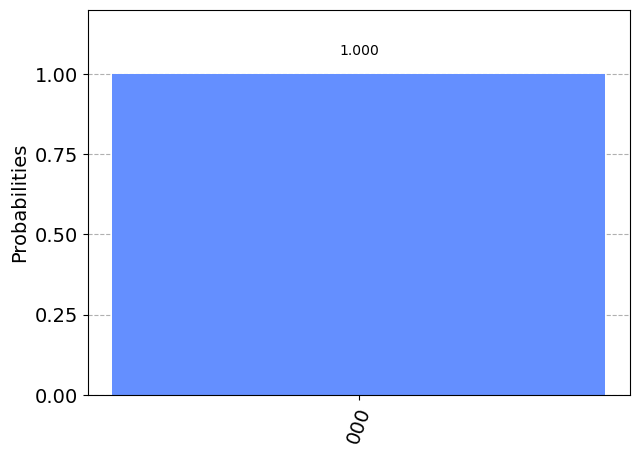

In [9]:
counts = simulate_circuit(qc)
plot_histogram(counts)

### Testing the Oracle for balanced function $f$

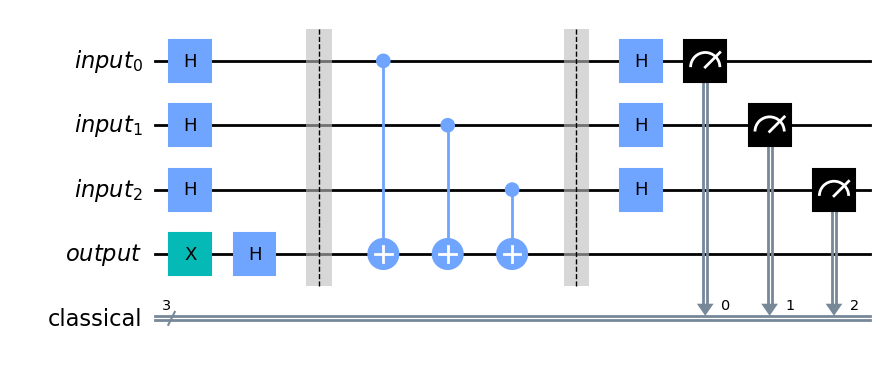

In [10]:
# define number of qubits
n = 3

q_in = QuantumRegister(n, 'input')
q_out = QuantumRegister(1, 'output')
cr = ClassicalRegister(n, 'classical')
qc = QuantumCircuit(q_in, q_out, cr)

# Apply H gate to all input quibits
qc.h(q_in)

# Prepare output qubit in superposition state |->
qc.x(q_out)
qc.h(q_out)

# Apply Oracle
Deutsch_Jozsa_balanced_oracle(qc, q_in, q_out, True)

# Collapse Wave Functions
qc.h(q_in)

# measure input qubits
qc.measure(q_in, cr)

qc.draw(output="mpl")

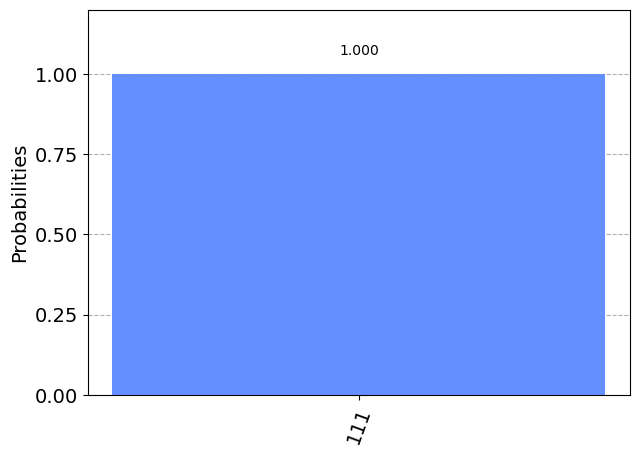

In [11]:
counts = simulate_circuit(qc)
plot_histogram(counts)

# Simon's Problem

Simon's Algorithm is the first quantum algorithm that solves a problem exponentially faster than a classical computer. The problem is the following. Given a function $f: \{0,1\}^{n} \rarr \{0,1\}^{n}$ such that $f(x) = f(y)$ if and only if $x \oplus y = s$. Find $s$.

We start by creating 2 n-qubit registers.

$$
\begin{aligned}
\ket{\psi_0} = \ket{0}^{n} \otimes \ket{0}^{n}
\end{aligned}
$$

The first register is the input of the function $f$ and the second register is its output. We then apply $H$ gates to all the qubits in the first register as to create a superposition of all the possible input bit strings.

$$
\begin{aligned}
\ket{\psi_1} = \frac{1}{\sqrt{2^{n}}}\left(\sum_{z \in 2^{n}} \ket{z}\right) \otimes \ket{0}^{n}
\end{aligned}
$$

We then apply the Oracle $U_f$ to the state $\ket{\psi_1}$. The Oracle will apply the function $f$ to the input register and will store the output in the second register. The resulting state will be:

$$
\begin{aligned}
\ket{\psi_2} = \frac{1}{\sqrt{2^{n}}}\left(\sum_{z \in 2^{n}} \ket{z} \otimes \ket{f(z)}\right)
\end{aligned}
$$

By measuring the output register we will obtain a random ouput bit string $z^{,}$ with probability $\frac{1}{\sqrt{2^{n}}}$. This measurement will collapse the input register into the state:
$$
\begin{aligned}
\frac{1}{\sqrt{2}}\left(\ket{x} + \ket{y}\right) \quad s.\,t.\, \quad y = x \oplus s.
\end{aligned}
$$
After applying $H$ gates to the input register we will obtain the state:

$$
\begin{aligned}
\ket{\psi_3} = \frac{1}{\sqrt{2^{n+1}}}\left(\sum_{z \in 2^{n}}(-1)^{z \cdot x}\ket{z} + (-1)^{z \cdot (x \oplus s)}\ket{z}\right) \Leftrightarrow
\end{aligned}
$$
$$
\begin{aligned}
\Leftrightarrow \frac{1}{\sqrt{2^{n+1}}}\left(\sum_{z \in 2^{n}}(-1)^{z \cdot x}(1 + (-1)^{z \cdot s})\ket{z}\right)
\end{aligned}
$$

Notice that if $z \cdot s = 1$ we get destructive interference and loose the state $\ket{z}$. However if $z \cdot s = 0$ we can measure the state $\ket{z}$ with probability $\frac{1}{\sqrt{2^{n+1}}}$ and we know that $z \cdot x = 0$. If run the algorithm n - 1 times we will, with some luck, obtain a set of n linearly independent such that:

$$
\begin{aligned}
\begin{cases}
z_1 \cdot s = 0 \\
z_2 \cdot s = 0 \\
\vdots \\
\end{cases}
\end{aligned}
$$

Solving the system of linear equations we will obtain $s$.

Let us now define the Simon's Oracle for a given bit string $s$.

In [3]:
def Simons_Oracle(qc: QuantumCircuit, q_in: QuantumRegister, q_out: QuantumRegister, s: str, barriers: bool = True):
    if barriers: qc.barrier()

    # Start by copying the state in q_in register to the q_out register
    for input, output in zip(q_in, q_out):
        qc.cx(input, output)

    # Loop backwards through the bit string
    # If you find a 1 in the jth place perform a cx gate using the jth input and jth outut
    # If you find a 1 in the (j+i)th place perform a cx gate using the jth input and (j+i)th outut
    s_decoded = list(reversed([int(bit) for bit in s]))
    for j in range(len(s_decoded)):
        if s_decoded[j] == 1:
            for i in range(j,len(s_decoded)):
                if(s_decoded[i] == 1):
                    qc.cx(q_in[j], q_out[i])
            break

    if barriers: qc.barrier()

### Testing Simon's Oracle

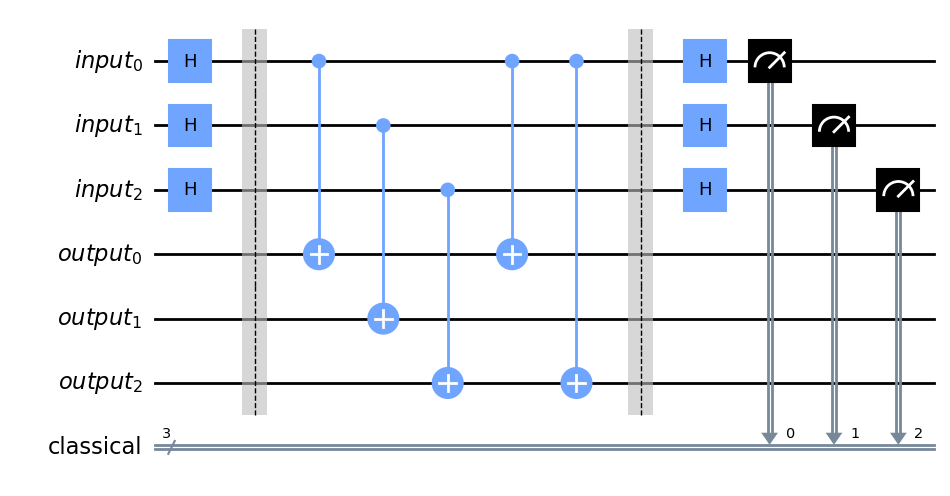

In [4]:
s = '101'
n = len(s)

q_in = QuantumRegister(n, 'input')
q_out = QuantumRegister(n, 'output')
cr = ClassicalRegister(n, 'classical')
qc = QuantumCircuit(q_in, q_out, cr)

# Apply H gate to first register of qubits
qc.h(q_in)

# Apply Simon's Oracle using string s
Simons_Oracle(qc, q_in, q_out, s, True)

# Apply H gate to first register of qubits
qc.h(q_in)

# Measure first register of qubits to get the
qc.measure(q_in, cr)

qc.draw(output="mpl")

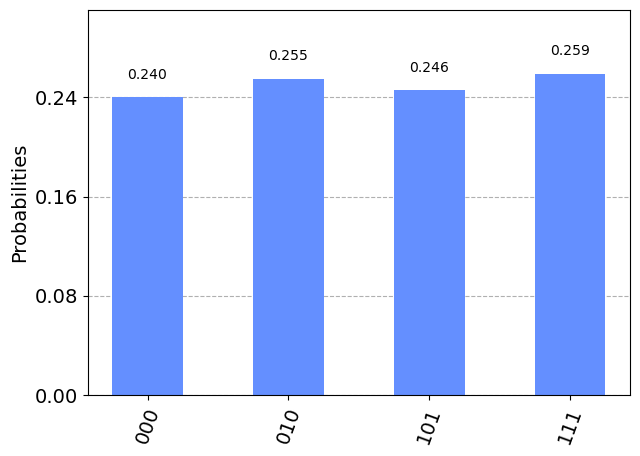

In [12]:
counts = simulate_circuit(qc)
plot_histogram(counts)

# Grover's Algorithm